# **BMEN 415 - Final Project**
**Regression - Model 3: voting regressor **

### **Data Preprocessing, Model Creation & Training the Model**

#### Importing Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Training Dataset

In [104]:
df_train = pd.read_csv('regression_train.csv')
df_train = df_train.drop(df_train.columns[0:2], axis = 1)
df_train

,age,sex,site_r,ttbmd_r,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,...,tbbvtv_t,tbn_t,tbth_t,tbsp_t,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t
0,78.4,0,Radius L,209.0,116.3,16.0,1.248,0.215,0.794,734.4,...,18.0,1.226,0.230,0.804,632.4,4.85,1.097,763.9,667.3,102.1
1,73.6,1,Radius R,247.0,135.9,17.7,1.296,0.246,0.759,832.5,...,22.5,1.166,0.264,0.847,849.3,4.51,1.660,732.7,588.9,149.2
2,21.7,0,Radius L,319.9,143.4,19.5,1.427,0.209,0.665,941.4,...,26.7,1.621,0.233,0.571,957.4,0.43,1.337,622.1,513.6,113.4
3,68.3,0,Radius R,246.4,92.9,12.4,1.067,0.230,0.930,854.6,...,24.0,1.464,0.240,0.635,759.1,6.87,1.391,723.2,602.8,125.8
4,68.1,0,Radius R,271.5,85.2,11.2,1.033,0.203,0.946,898.0,...,14.5,1.152,0.218,0.862,882.9,2.51,1.359,545.4,442.4,107.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,42.0,0,Radius L,364.1,128.3,17.1,1.160,0.233,0.850,1003.9,...,13.8,1.127,0.222,0.888,939.5,1.44,1.602,686.8,549.8,142.3
156,43.4,1,Radius L,504.2,92.9,11.9,1.105,0.197,0.864,1069.8,...,14.6,1.182,0.222,0.829,1043.8,0.24,1.831,394.3,278.5,119.7
157,22.9,0,Radius L,335.2,111.8,15.6,1.119,0.209,0.856,945.8,...,23.8,1.097,0.259,0.866,961.5,0.70,1.402,571.9,463.0,113.7
158,42.8,1,Radius L,423.4,199.6,27.9,1.462,0.249,0.622,958.1,...,24.9,1.439,0.246,0.666,941.0,1.98,1.932,737.9,563.5,180.0


#### Checking for any Missing Values in the Dataset

In [105]:
df_train.isnull().sum()

age         0
sex         0
site_r      0
ttbmd_r     0
tbbmd_r     0
tbbvtv_r    0
tbn_r       0
tbth_r      0
tbsp_r      0
ctbmd_r     0
ctpo_r      0
ctth_r      0
ttar_r      0
tbar_r      0
ctar_r      0
site_t      0
ttbmd_t     0
tbbmd_t     0
tbbvtv_t    0
tbn_t       0
tbth_t      0
tbsp_t      0
ctbmd_t     0
ctpo_t      0
ctth_t      0
ttar_t      0
tbar_t      0
ctar_t      0
dtype: int64

#### One Hot Encoding Columns site_r and site_t

In [106]:
df_ohe = pd.get_dummies(data = df_train, columns = ['site_r', 'site_t'])
df_ohe

,age,sex,ttbmd_r,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,ctpo_r,...,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t,site_r_Radius L,site_r_Radius R,site_t_Tibia L,site_t_Tibia R
0,78.4,0,209.0,116.3,16.0,1.248,0.215,0.794,734.4,1.60,...,632.4,4.85,1.097,763.9,667.3,102.1,1,0,1,0
1,73.6,1,247.0,135.9,17.7,1.296,0.246,0.759,832.5,1.25,...,849.3,4.51,1.660,732.7,588.9,149.2,0,1,1,0
2,21.7,0,319.9,143.4,19.5,1.427,0.209,0.665,941.4,0.11,...,957.4,0.43,1.337,622.1,513.6,113.4,1,0,1,0
3,68.3,0,246.4,92.9,12.4,1.067,0.230,0.930,854.6,1.65,...,759.1,6.87,1.391,723.2,602.8,125.8,0,1,1,0
4,68.1,0,271.5,85.2,11.2,1.033,0.203,0.946,898.0,0.67,...,882.9,2.51,1.359,545.4,442.4,107.8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,42.0,0,364.1,128.3,17.1,1.160,0.233,0.850,1003.9,0.23,...,939.5,1.44,1.602,686.8,549.8,142.3,1,0,1,0
156,43.4,1,504.2,92.9,11.9,1.105,0.197,0.864,1069.8,0.71,...,1043.8,0.24,1.831,394.3,278.5,119.7,1,0,1,0
157,22.9,0,335.2,111.8,15.6,1.119,0.209,0.856,945.8,0.11,...,961.5,0.70,1.402,571.9,463.0,113.7,1,0,1,0
158,42.8,1,423.4,199.6,27.9,1.462,0.249,0.622,958.1,1.03,...,941.0,1.98,1.932,737.9,563.5,180.0,1,0,1,0


#### Correlation Heat Map

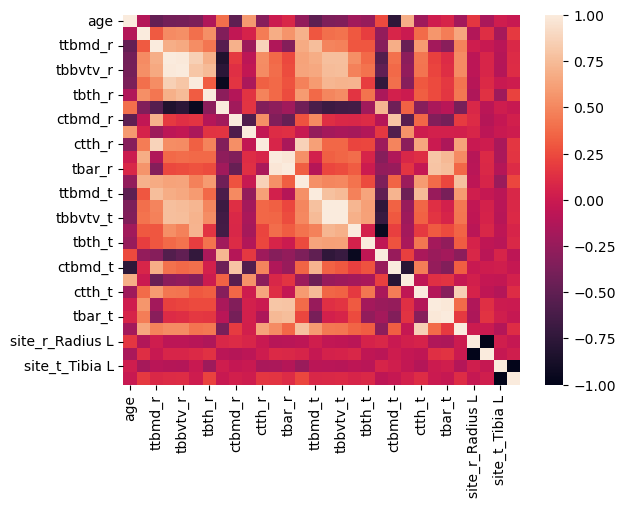

In [107]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_ohe.corr()
sns.heatmap(correlations)
plt.show()

#### Splitting Training Dataset into Independent and Dependent Variable (X and y Datasets)

In [108]:
X = df_ohe.drop(columns = ['ttbmd_r'])
X

,age,sex,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,ctpo_r,ctth_r,...,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t,site_r_Radius L,site_r_Radius R,site_t_Tibia L,site_t_Tibia R
0,78.4,0,116.3,16.0,1.248,0.215,0.794,734.4,1.60,0.733,...,632.4,4.85,1.097,763.9,667.3,102.1,1,0,1,0
1,73.6,1,135.9,17.7,1.296,0.246,0.759,832.5,1.25,0.939,...,849.3,4.51,1.660,732.7,588.9,149.2,0,1,1,0
2,21.7,0,143.4,19.5,1.427,0.209,0.665,941.4,0.11,0.947,...,957.4,0.43,1.337,622.1,513.6,113.4,1,0,1,0
3,68.3,0,92.9,12.4,1.067,0.230,0.930,854.6,1.65,0.974,...,759.1,6.87,1.391,723.2,602.8,125.8,0,1,1,0
4,68.1,0,85.2,11.2,1.033,0.203,0.946,898.0,0.67,0.998,...,882.9,2.51,1.359,545.4,442.4,107.8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,42.0,0,128.3,17.1,1.160,0.233,0.850,1003.9,0.23,1.314,...,939.5,1.44,1.602,686.8,549.8,142.3,1,0,1,0
156,43.4,1,92.9,11.9,1.105,0.197,0.864,1069.8,0.71,1.560,...,1043.8,0.24,1.831,394.3,278.5,119.7,1,0,1,0
157,22.9,0,111.8,15.6,1.119,0.209,0.856,945.8,0.11,1.087,...,961.5,0.70,1.402,571.9,463.0,113.7,1,0,1,0
158,42.8,1,199.6,27.9,1.462,0.249,0.622,958.1,1.03,1.581,...,941.0,1.98,1.932,737.9,563.5,180.0,1,0,1,0


In [109]:
y = pd.DataFrame(df_ohe['ttbmd_r'], columns = ['ttbmd_r'])
y

,ttbmd_r
0,209.0
1,247.0
2,319.9
3,246.4
4,271.5
...,...
155,364.1
156,504.2
157,335.2
158,423.4


#### Making the Voting Model using Linear, random forest, Ridge, and Gaussian Process

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r4 = Ridge(alpha=2.0)
kernel = DotProduct() + WhiteKernel()
r5 = GaussianProcessRegressor(random_state=0, kernel = kernel)

model = VotingRegressor([('lr', r1), ('rf', r2), ('Rr', r4), ('Gr', r5)])
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('Rr', Ridge(alpha=2.0)),
                            ('Gr',
                             GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                                                      random_state=0))])

#### R Squared Value - When Implementing the Training Set to the Model

In [111]:
model.score(X, y)

0.9882245109700203

### **Implementing Testing Data to the Model Created**

#### Importing the Testing Dataset

In [112]:
df_test = pd.read_csv('regression_test.csv')
df_test = df_test.drop(df_test.columns[0:2], axis = 1)
df_test

,age,sex,site_r,ttbmd_r,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,...,tbbvtv_t,tbn_t,tbth_t,tbsp_t,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t
0,67.6,1,Radius L,410.7,194.1,26.8,1.696,0.235,0.539,962.9,...,27.3,1.483,0.257,0.628,934.0,1.27,1.600,804.1,652.8,157.0
1,67.4,0,Radius L,297.9,140.1,18.8,1.423,0.209,0.685,898.2,...,27.2,1.460,0.258,0.647,860.3,1.55,1.333,736.5,618.5,123.5
2,63.5,0,Radius L,341.7,102.3,14.9,1.059,0.215,0.910,935.3,...,22.7,1.155,0.256,0.842,799.0,3.93,1.436,714.1,591.1,128.3
3,19.6,0,Radius L,342.7,166.2,23.5,1.476,0.218,0.625,931.2,...,32.2,1.432,0.312,0.671,937.9,0.58,1.545,717.9,588.9,134.3
4,66.5,0,Radius R,433.9,156.8,21.3,1.565,0.228,0.622,950.3,...,27.1,1.523,0.247,0.609,860.3,2.79,1.349,561.0,457.3,108.5
5,43.7,0,Radius L,404.2,174.9,23.5,1.571,0.217,0.602,988.0,...,26.2,1.620,0.242,0.590,991.2,0.80,1.790,647.6,498.9,153.8
6,25.9,0,Radius L,220.2,105.5,13.8,1.220,0.201,0.804,881.3,...,24.2,1.357,0.242,0.700,941.6,0.93,1.237,716.8,611.1,111.0
7,38.8,1,Radius R,439.0,209.8,29.8,1.570,0.251,0.573,914.9,...,26.1,1.185,0.280,0.799,939.5,3.51,1.705,533.0,402.8,134.8
8,28.9,1,Radius L,450.2,228.3,32.0,1.604,0.281,0.574,925.7,...,29.1,1.311,0.268,0.718,981.9,0.64,1.725,734.9,582.3,158.0
9,25.9,0,Radius L,303.8,152.1,21.1,1.401,0.228,0.676,928.9,...,30.7,1.482,0.257,0.608,924.1,1.59,1.362,690.6,574.5,121.2


#### Checking for any Missing Values in the Dataset

In [113]:
df_test.isnull().sum()

age         0
sex         0
site_r      0
ttbmd_r     0
tbbmd_r     0
tbbvtv_r    0
tbn_r       0
tbth_r      0
tbsp_r      0
ctbmd_r     0
ctpo_r      0
ctth_r      0
ttar_r      0
tbar_r      0
ctar_r      0
site_t      0
ttbmd_t     0
tbbmd_t     0
tbbvtv_t    0
tbn_t       0
tbth_t      0
tbsp_t      0
ctbmd_t     0
ctpo_t      0
ctth_t      0
ttar_t      0
tbar_t      0
ctar_t      0
dtype: int64

#### One Hot Encoding Columns site_r and site_t

In [114]:
df_test_ohe = pd.get_dummies(data = df_test, columns = ['site_r', 'site_t'])
df_test_ohe

,age,sex,ttbmd_r,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,ctpo_r,...,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t,site_r_Radius L,site_r_Radius R,site_t_Tibia L,site_t_Tibia R
0,67.6,1,410.7,194.1,26.8,1.696,0.235,0.539,962.9,0.46,...,934.0,1.27,1.600,804.1,652.8,157.0,1,0,1,0
1,67.4,0,297.9,140.1,18.8,1.423,0.209,0.685,898.2,0.69,...,860.3,1.55,1.333,736.5,618.5,123.5,1,0,1,0
2,63.5,0,341.7,102.3,14.9,1.059,0.215,0.910,935.3,0.69,...,799.0,3.93,1.436,714.1,591.1,128.3,1,0,1,0
3,19.6,0,342.7,166.2,23.5,1.476,0.218,0.625,931.2,0.12,...,937.9,0.58,1.545,717.9,588.9,134.3,1,0,1,0
4,66.5,0,433.9,156.8,21.3,1.565,0.228,0.622,950.3,0.37,...,860.3,2.79,1.349,561.0,457.3,108.5,0,1,1,0
5,43.7,0,404.2,174.9,23.5,1.571,0.217,0.602,988.0,0.33,...,991.2,0.80,1.790,647.6,498.9,153.8,1,0,1,0
6,25.9,0,220.2,105.5,13.8,1.220,0.201,0.804,881.3,0.29,...,941.6,0.93,1.237,716.8,611.1,111.0,1,0,1,0
7,38.8,1,439.0,209.8,29.8,1.570,0.251,0.573,914.9,0.71,...,939.5,3.51,1.705,533.0,402.8,134.8,0,1,1,0
8,28.9,1,450.2,228.3,32.0,1.604,0.281,0.574,925.7,0.43,...,981.9,0.64,1.725,734.9,582.3,158.0,1,0,1,0
9,25.9,0,303.8,152.1,21.1,1.401,0.228,0.676,928.9,0.19,...,924.1,1.59,1.362,690.6,574.5,121.2,1,0,1,0


#### Splitting Testing Dataset into Independent and Dependent Variable (X and y Datasets)

In [115]:
X_test = df_test_ohe.drop(columns = ['ttbmd_r'])
X_test

,age,sex,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,ctpo_r,ctth_r,...,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t,site_r_Radius L,site_r_Radius R,site_t_Tibia L,site_t_Tibia R
0,67.6,1,194.1,26.8,1.696,0.235,0.539,962.9,0.46,1.360,...,934.0,1.27,1.600,804.1,652.8,157.0,1,0,1,0
1,67.4,0,140.1,18.8,1.423,0.209,0.685,898.2,0.69,1.032,...,860.3,1.55,1.333,736.5,618.5,123.5,1,0,1,0
2,63.5,0,102.3,14.9,1.059,0.215,0.910,935.3,0.69,1.193,...,799.0,3.93,1.436,714.1,591.1,128.3,1,0,1,0
3,19.6,0,166.2,23.5,1.476,0.218,0.625,931.2,0.12,1.055,...,937.9,0.58,1.545,717.9,588.9,134.3,1,0,1,0
4,66.5,0,156.8,21.3,1.565,0.228,0.622,950.3,0.37,1.313,...,860.3,2.79,1.349,561.0,457.3,108.5,0,1,1,0
5,43.7,0,174.9,23.5,1.571,0.217,0.602,988.0,0.33,1.282,...,991.2,0.80,1.790,647.6,498.9,153.8,1,0,1,0
6,25.9,0,105.5,13.8,1.220,0.201,0.804,881.3,0.29,0.747,...,941.6,0.93,1.237,716.8,611.1,111.0,1,0,1,0
7,38.8,1,209.8,29.8,1.570,0.251,0.573,914.9,0.71,1.249,...,939.5,3.51,1.705,533.0,402.8,134.8,0,1,1,0
8,28.9,1,228.3,32.0,1.604,0.281,0.574,925.7,0.43,1.547,...,981.9,0.64,1.725,734.9,582.3,158.0,1,0,1,0
9,25.9,0,152.1,21.1,1.401,0.228,0.676,928.9,0.19,0.953,...,924.1,1.59,1.362,690.6,574.5,121.2,1,0,1,0


In [116]:
y_test = pd.DataFrame(df_test_ohe['ttbmd_r'], columns = ['ttbmd_r'])
y_test

,ttbmd_r
0,410.7
1,297.9
2,341.7
3,342.7
4,433.9
5,404.2
6,220.2
7,439.0
8,450.2
9,303.8


#### Predicting

In [117]:
predicted = model.predict(X_test)
df_predicted = pd.DataFrame(predicted, columns = ['y Predicted'])
df_predicted

,y Predicted
0,419.478360
1,297.338502
2,325.821360
3,340.156800
4,394.050750
5,405.931554
6,227.859670
7,426.566265
8,448.049439
9,304.635898


#### Comparing the Predicted Values with the Actual y_test Values

In [118]:
df_prediction = pd.concat([df_predicted, y_test], axis = 1)
df_prediction.columns = ['y Predicted', 'y Actual']
df_prediction

,y Predicted,y Actual
0,419.478360,410.7
1,297.338502,297.9
2,325.821360,341.7
3,340.156800,342.7
4,394.050750,433.9
5,405.931554,404.2
6,227.859670,220.2
7,426.566265,439.0
8,448.049439,450.2
9,304.635898,303.8


#### R Squared Value of the Predicted y_test Values vs. the Actual y_test Values

In [119]:
from sklearn.metrics import r2_score

r2_score(df_prediction['y Actual'], df_prediction['y Predicted'])

0.963100640656765

#### Visual of the Predicted vs. Actual y_test Values w/ Error

In [120]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = df_prediction.index,
        y = df_prediction['y Predicted'],
        name = 'y Predicted'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_prediction.index,
        y = df_prediction['y Actual'],
        name = 'Actual'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_prediction.index,
        y = abs(df_prediction['y Actual'] - df_prediction['y Predicted']),
        name = 'Error'
    )
)

fig.update_layout(
    title = 'y Predicted vs y Actual for Decision Tree Regression',
    xaxis_title = 'Sample Number',
    yaxis_title = 'Bone Density',
    legend_title = 'Legend',
    font=dict(
        family = 'Arial',
        size = 12,
        color = 'Black'
    )
)

fig.show()